In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=26f132a4caa3ed72292bb72f434e6eb48b57a438df8f14818861603cd96dc10b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import numpy as np
import pandas as pd
import time

In [ ]:
li = []
for i in range(3, 4):
  if(i<10):
    li.append("0"+str(i))
  else:
    li.append(str(i))

In [ ]:
#data downloading
for date in li:
  date = str(date)
  dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-"+date+"/2021-01-"+date+"-dataset.tsv.gz?raw=true"
  os.mkdir('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan')
  wget.download(dataset_URL, out='/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv.gz')

  with gzip.open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv.gz', 'rb') as f_in:
      with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)

  os.unlink('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv.gz')


  #english language filtering and location filtering
  filtered_language = 'en'
  filtered_tw = list()
  current_line = 1
  with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv') as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv', current_line))

      for line in tsvreader:
        if line[3] == filtered_language and line[4]!="NULL":
          filtered_tw.append(linecache.getline('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv', current_line))
        current_line += 1
        if current_line==100:  break
    with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan'+'/dataset.tsv', 'w') as f_output:
        for item in filtered_tw:
            f_output.write(item)
  


In [ ]:
#creating directory and saving data on  files
for i in li:
  os.chdir('/content/drive/MyDrive/Covid19/Jan2021/'+i+'jan')
  time.sleep(1)
  !python /content/drive/MyDrive/Covid19/get_metadata.py -i dataset.tsv  -o dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json -m e


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Covid19/jan2021.csv')

In [ ]:
data.shape

(14184, 16)

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Capstone/misinformation/coviddata/Covid2021.csv')

In [ ]:
data1.head()

id_str favorite_count  ... user_verification user_followers
0  1344874731011452928              0  ...             False            233
1  1344872582479290371             14  ...             False           3129
2  1344876362855710728              0  ...             False             96
3  1344877225443790849              3  ...             False            570
4  1344871464340774917              0  ...             False            678

[5 rows x 16 columns]

In [ ]:
data.head()

id_str favorite_count  ... user_verification user_followers
0  1344874731011452928              0  ...             False            236
1  1344876078263914498              7  ...             False            140
2  1344872582479290371             14  ...             False           3148
3  1344876362855710728              0  ...             False             96
4  1344877225443790849              3  ...             False            570

[5 rows x 16 columns]

In [ ]:
for i in range(1000):
  print(data['text'][i])

In [ ]:
for i in range(11000,11100):
  print(data['text'][i])

b'Evil Boris Satans son pulled the same evil Plandemic lies! Peolple wake up! Deb https://t.co/f10k8hxqOt'
b'This is a must read. \n#COVID19 \n#lockdown https://t.co/4AqY4hbAME'
b'Reposting this for my colleagues worried about their place in the vaccine queue.\nhttps://t.co/GeH8RIgSp1'
b'Damn another republican died from covid? Party ain\xe2\x80\x99t gone learn until half of them gone huh. https://t.co/60SpEahqF7'
b'One day people are going to look back at pictures of themselves with masks on and realize how fucken dumb they really were https://t.co/AbnQgqDTVy'
b'Even if we \xe2\x80\x9ccontain\xe2\x80\x9d covid, there will always be a risk because of this border. https://t.co/F72Oirq16O'
b'I hate to admit it, but... Mittens\xe2\x80\x99 statement here is a good one? Leaving this undertaking up to the individual states is just par for the course and to be expected from our current Federal overlords. I hope Biden\xe2\x80\x99s team is working up some kind of birthdate lottery or something?

In [ ]:
#data downloading
for date in li:
  date = str(date)
  dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-"+date+"/2021-01-"+date+"_clean-dataset.tsv.gz?raw=true"
  os.mkdir('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned')
  wget.download(dataset_URL, out='/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv.gz')

  with gzip.open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv.gz', 'rb') as f_in:
      with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)

  os.unlink('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv.gz')


  #english language filtering and location filtering
  filtered_language = 'en'
  filtered_tw = list()
  current_line = 1
  with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv') as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv', current_line))

      for line in tsvreader:
        if line[3] == filtered_language and line[4]!="NULL":
          filtered_tw.append(linecache.getline('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv', current_line))
        current_line += 1
        # if current_line==20000:  break
    with open('/content/drive/MyDrive/Covid19/Jan2021/'+date+'jan_cleaned'+'/dataset.tsv', 'w') as f_output:
        for item in filtered_tw:
            f_output.write(item)
  


In [ ]:
for i in li:
  os.chdir('/content/drive/MyDrive/Covid19/Jan2021/'+i+'jan_cleaned')
  time.sleep(1)
  !python /content/drive/MyDrive/Covid19/get_metadata.py -i dataset.tsv  -o dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json -m e


Your twitter api credentials are valid.
dataset_hydrated.tsv
dataset.tsv
tab seperated file, using \t delimiter
total ids: 5414
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 280

In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/10december

/content/drive/MyDrive/Capstone/misinformation/10december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/11december


/content/drive/MyDrive/Capstone/misinformation/11december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/12december


/content/drive/MyDrive/Capstone/misinformation/12december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/13december


/content/drive/MyDrive/Capstone/misinformation/13december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/14december


/content/drive/MyDrive/Capstone/misinformation/14december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
cd /content/drive/MyDrive/Capstone/misinformation/15december


/content/drive/MyDrive/Capstone/misinformation/15december


In [ ]:
!python /content/drive/MyDrive/Capstone/misinformation/get_metadata.py -i clean-dataset.tsv  -o clean-dataset_hydrated.tsv  -k /content/drive/MyDrive/Capstone/misinformation/api_keys.json


In [ ]:
df.head()

tweet_id        date      time lang country_code
0  1465909462384799744  2021-12-01  05:03:45   es          NaN
1  1465909465719451656  2021-12-01  05:03:46   en          NaN
2  1465909470706520067  2021-12-01  05:03:47   en          NaN
3  1465909473998901249  2021-12-01  05:03:48   en           NZ
4  1465909476544888834  2021-12-01  05:03:49   en          NaN

In [ ]:
#english language filtering and location filtering
filtered_language = 'en'
filtered_tw = list()
current_line = 1
with open("/content/drive/MyDrive/misinformation/clean-dataset.tsv") as tsvfile:
  tsvreader = csv.reader(tsvfile, delimiter="\t")

  if current_line == 1:
    filtered_tw.append(linecache.getline("/content/drive/MyDrive/misinformation/clean-dataset.tsv", current_line))

    for line in tsvreader:
      if line[3] == filtered_language and line[4]!="NULL":
        filtered_tw.append(linecache.getline("/content/drive/MyDrive/misinformation/clean-dataset.tsv", current_line))
      current_line += 1
      # if current_line==20000:  break
  with open('/content/drive/MyDrive/misinformation/clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)


In [ ]:
dfen = pd.read_csv('/content/drive/MyDrive/misinformation/clean-dataset-filtered.tsv', sep='\t')

In [ ]:
dfen.head()

tweet_id        date      time lang country_code
0  1465909473998901249  2021-12-01  05:03:48   en           NZ
1  1465909691586908163  2021-12-01  05:04:40   en           PH
2  1465909911829692420  2021-12-01  05:05:32   en           CA
3  1465909983846055943  2021-12-01  05:05:50   en           CA
4  1465910327422316554  2021-12-01  05:07:12   en           IN

In [ ]:
dfen.count()

tweet_id        3006
date            3006
time            3006
lang            3006
country_code    3001
dtype: int64

In [ ]:
dfen['country_code'].value_counts()

US    1237
ZA     421
GB     309
CA     176
IN     157
      ... 
KW       1
IR       1
MW       1
DK       1
VC       1
Name: country_code, Length: 97, dtype: int64

In [ ]:
dfen.isna().sum()

tweet_id        0
date            0
time            0
lang            0
country_code    5
dtype: int64

In [ ]:
  !python /content/drive/MyDrive/misinformation/get_metadata.py -i /content/drive/MyDrive/misinformation/clean-dataset-filtered.tsv -o /content/drive/MyDrive/misinformation/01_dec_en_hydrated.tsv -k /content/drive/MyDrive/misinformation/api_keys.json

# clear_output()

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/misinformation/01_dec_en_hydrated.csv')

In [ ]:
data.head(100)

id_str  favorite_count  ... user_verification  user_followers
0   1465915043023781893               0  ...             False            2692
1   1465909473998901249               1  ...             False             442
2   1465912332828225536               2  ...             False               9
3   1465928797904060417               1  ...             False             176
4   1465922434004049925               0  ...             False            7154
..                  ...             ...  ...               ...             ...
95  1465932195969880064               0  ...             False             183
96  1465945375680913409               6  ...             False           56585
97  1465950446837714946               0  ...             False            2188
98  1465938046545707013               0  ...             False             626
99  1465946388102107136              26  ...             False            6579

[100 rows x 16 columns]

In [ ]:
data['media'].value_counts().sum()

105

In [ ]:
data['longitude'].value_counts().sum()

79

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Capstone/misinformation/mydata.csv')

In [ ]:
data.head()

id_str favorite_count  ... user_verification user_followers
0  1344874731011452928              0  ...             False            233
1  1344872582479290371             14  ...             False           3129
2  1344876362855710728              0  ...             False             96
3  1344877225443790849              3  ...             False            570
4  1344871464340774917              0  ...             False            678

[5 rows x 16 columns]

In [ ]:
data.count()

id_str               605060
favorite_count       605060
text                 605060
is_retweet           605060
created_at           605060
retweet_count        605060
media                 26655
country_code         602996
country              603850
lattitude             18103
longitude             18103
user_id              605060
user_name            605005
user_description     565778
user_verification    605060
user_followers       605060
dtype: int64

In [ ]:
X = data['text']

In [ ]:
X = X.str.lower()

In [ ]:
X= X.apply(lambda x: remove_stopwords(x))

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer


In [ ]:
X = X.str.replace('[^\w\s]',' ').str.replace(r"http\S+|www\S+|https\S+",' ').str.replace(r'\@\w+|\#', ' ')
X = X.str.replace(r'\b\w\b', ' ').str.replace(r'\s+', ' ')

In [ ]:
X = X.str.replace(r"x\S+",'').str.replace(r"[c][o]\b", '')

In [ ]:
text = " "
for i in range(len(X)):
  line = X[i].split();
  text += " ".join(line)

In [ ]:
text

' when covid end omicron variant changed covid endgame deseret news pmocjqc1nxhunt quitting politics resign immediately diabolical handling covid 19 pandemic botch qetilg90h8pfizer ceo very confident company oral covid 19 pill effective new variant lzonly ppl virus vaccinated nowadays frfr 8hilemytzmallpreksmatter point credible report covid 19 vaccine caused fatalitygood decision sir prevention better cure 75ymogiycfhere handle post covid vaccine amp booster nausea great article thankyou covid19 covidvaccine czmlltqm74this help palestinian agenda amp agenda matters lives people covid19 ajq14a4iirah western countries falling ban travel netherlands nsouth africa sho oldil5et6rkontikidave wbeatak morawieckim mshnlp pritchard_ellie voicebyvote msmithobx louangie eilismoon11 na1ku2sm2dmore people died opioids canada world covid19 gets attention jc3v1zyasvcovid19 newvariant european dutch variant please impose travelbans they aqae1vworld aids day annually commemorated december nworking end 

In [ ]:
X[0]

' when covid end omicron variant changed covid    endgame deseret news  pmocjqc1nx '

In [ ]:
def lematizer(X):
  nltk.download('wordnet')
  mylemitizer = WordNetLemmatizer()
  newX =[]
  for line in X:
    line = line.split()
    newdataline=[]
    for words in line:
      words = mylemitizer.lemmatize(words)
      newdataline.append(words)
    newdataline = ' '.join(newdataline)  
    newX.append(newdataline)
  return newX

In [ ]:
X = lematizer(X)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(text)

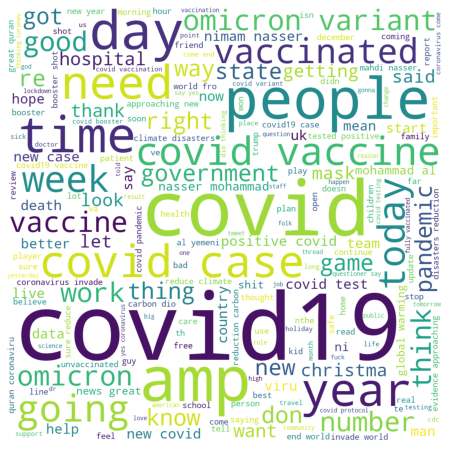

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
X[0]

' when covid end omicron variant changed covid xe2 x80 x99s endgame deseret news co pmocjqc1nx '

In [ ]:
file1 = open('/content/drive/MyDrive/Capstone/misinformation/coviddata/FinalDataCovid.csv','a')
file2 = open('/content/drive/MyDrive/Capstone/misinformation/coviddata/data.csv','r')

In [ ]:
count=1
for line in file2:
  if count>1:
    file1.write(line)
    count+=1
  else:
    count+=1

In [ ]:
import pandas as pd
import re

In [ ]:
Coviddata = pd.read_csv('/content/drive/MyDrive/Capstone/misinformation/coviddata/FinalDataCovid.csv')

In [ ]:
Coviddata.count()

id_str               968717
favorite_count       968717
text                 968717
is_retweet           968717
created_at           968717
retweet_count        968717
media                 41529
country_code         963358
country              964739
lattitude             26202
longitude             26202
user_id              968717
user_name            968639
user_description     904781
user_verification    968717
user_followers       968717
dtype: int64

In [ ]:
Coviddata.head()

id_str favorite_count  ... user_verification user_followers
0  1344874731011452928              0  ...             False            233
1  1344872582479290371             14  ...             False           3129
2  1344876362855710728              0  ...             False             96
3  1344877225443790849              3  ...             False            570
4  1344871464340774917              0  ...             False            678

[5 rows x 16 columns]

Month Wise Data

In [ ]:
type(Coviddata['created_at'][0])

str

In [ ]:
Coviddata['created_at'][0]

'Fri Jan 01 05:14:57 +0000 2021'

In [ ]:
Coviddata.head()

id_str favorite_count  ... user_verification user_followers
0  1344874731011452928              0  ...             False            233
1  1344872582479290371             14  ...             False           3129
2  1344876362855710728              0  ...             False             96
3  1344877225443790849              3  ...             False            570
4  1344871464340774917              0  ...             False            678

[5 rows x 16 columns]

In [ ]:
Coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968717 entries, 0 to 968716
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id_str             968717 non-null  object
 1   favorite_count     968717 non-null  object
 2   text               968717 non-null  object
 3   is_retweet         968717 non-null  object
 4   created_at         968717 non-null  object
 5   retweet_count      968717 non-null  object
 6   media              41529 non-null   object
 7   country_code       963358 non-null  object
 8   country            964739 non-null  object
 9   lattitude          26202 non-null   object
 10  longitude          26202 non-null   object
 11  user_id            968717 non-null  object
 12  user_name          968639 non-null  object
 13  user_description   904781 non-null  object
 14  user_verification  968717 non-null  object
 15  user_followers     968717 non-null  object
dtypes: object(16)
memory

In [ ]:
a = Coviddata[Coviddata['created_at']]

In [ ]:
a.count()

AttributeError: ignored

In [ ]:
Coviddata['country_code'].value_counts()

US    397598
GB    123363
IN    112997
CA     74597
AU     34669
       ...  
CK         1
TF         1
AQ         1
AS         1
TV         1
Name: country_code, Length: 230, dtype: int64

In [ ]:
countries = Coviddata['country'].value_counts()

In [ ]:
pd.set_option('display.max_rows', None)

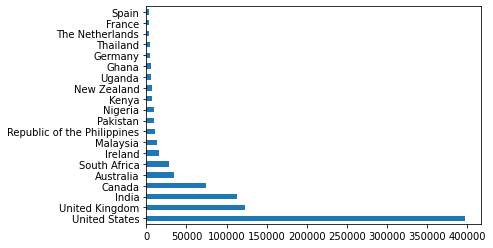

In [ ]:
Coviddata['country'].value_counts()[:20].plot(kind='barh')

In [ ]:
Coviddata['country'].value_counts()>=1000

United States                           True
United Kingdom                          True
India                                   True
Canada                                  True
Australia                               True
                                       ...  
Cook Islands                           False
French Southern and Antarctic Lands    False
Antarctica                             False
American Samoa                         False
Tuvalu                                 False
Name: country, Length: 232, dtype: bool

In [ ]:
print(countries)

United States                                   397612
United Kingdom                                  123363
India                                           112997
Canada                                           74597
Australia                                        34669
South Africa                                     27668
Ireland                                          16342
Malaysia                                         13712
Republic of the Philippines                      11241
Pakistan                                         10159
Nigeria                                           9555
Kenya                                             7684
New Zealand                                       6833
Uganda                                            5856
Ghana                                             5336
Germany                                           4293
Thailand                                          4064
The Netherlands                                   3539
France    

In [ ]:
Covid

In [ ]:
US_Covid_Data = Coviddata[Coviddata['country']=='United States']


In [ ]:
US_Covid_Data.count()

id_str               397612
favorite_count       397612
text                 397612
is_retweet           397612
created_at           397612
retweet_count        397612
media                 12560
country_code         397612
country              397612
lattitude              7175
longitude              7175
user_id              397612
user_name            397580
user_description     371512
user_verification    397612
user_followers       397612
dtype: int64

In [ ]:
US_Covid_Data['country_code'].value_counts()

US    397598
PR        14
Name: country_code, dtype: int64

In [ ]:
US_text = US_Covid_Data['text']

In [ ]:
US_text

0         b'@HoodieBoomstick @coronavirus Joined 2009 du...
1         b'Let\xe2\x80\x99s be real. There\xe2\x80\x99s...
2         b'Replying @BBCBreaking @CNBCnow @FT @AFP @der...
3         b'don\xe2\x80\x99t complain about covid-19 if ...
4                        b'Coronavirus is over now. Right?'
                                ...                        
968710    b'But we shall see. At the very least, let\xe2...
968711    b'even though he tested negative, my man is re...
968712    b'Not that there was much reason to suspect an...
968713    b"Can we just make sure that no one opens any ...
968714    b'\xe2\x80\x9c Brandon, save Texas \xe2\x80\x9...
Name: text, Length: 397612, dtype: object

In [ ]:
US_Covid_Data['hashtag'] = US_Covid_Data['text'].apply(lambda x: re.findall(r"#(\w+)", x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
US_Covid_Data.head(120)

id_str favorite_count  ... user_followers              hashtag
0    1344874731011452928              0  ...            233                   []
1    1344872582479290371             14  ...           3129                   []
2    1344876362855710728              0  ...             96                   []
3    1344877225443790849              3  ...            570                   []
4    1344871464340774917              0  ...            678                   []
..                   ...            ...  ...            ...                  ...
223  1344896940354326529              3  ...            369                   []
224  1344895682969276417              2  ...            264  [COVID19, newyears]
225  1344892389404635136              7  ...          16914                   []
226  1344896799752990720              0  ...           1280       [journoliving]
228  1344898488253997056              0  ...           2493                   []

[120 rows x 17 columns]

In [ ]:
us_hashtag = US_Covid_Data['hashtag']

In [ ]:
hashtag = " "
for i in us_hashtag:
  if(len(i)==1):
    hashtag += " "
    hashtag += " ".join(i)
    hashtag += " "
  else:
    hashtag += " ".join(i)
  

In [ ]:
hashtag

' COVID19 LouWestEnd 2021BeginsHAPPYNEWYEAR 2021makeawish Bye2020 fireworks andersoncooper Hello2021 cnnnye  COVID19  COVID19  COVID19  WuhanVirus  Trump  coronavirus  CNNNYE  trumpvirus  HappyNewYear2021  COVID19  Syria  COVID19 StamfordVt SelectBoard COVID19grief loss trauma deathpositive 2021  covid19 trump covid19Birding COVID19 birdsHappyNewYear2021 Bye2020 GoodBye2020 HAPPYNEWYEAR happynewyear2021 kind decent peaceful houston texasgirlNewYear NewYearNewMecovid19 covidb117 florida covid19  COVID19  COVID19  COVID19 faces funny face me cute lol girl beauty lmaoCOVID19 prayersHappyNewYear2021 2020 COVID19 covid19 COVID19 newyears journoliving andrewcoumo Poloncarz taxeslost roadhouse lostwages COVID19 AmericanDream noscience bully celebrity ego covid19 NewYearResolution COVID 2021Resolution covid19SanDiego NYE2020 California COVID coronaviruskstate emaw COVID19 Sooners COVID19  covid19 happynewyear coronavirusGrandpa covid19 survivor FOE ThisIsMyLife CovidVaccines  covid19  covid19 

In [ ]:
hashtag = hashtag.lower()

In [ ]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(hashtag)

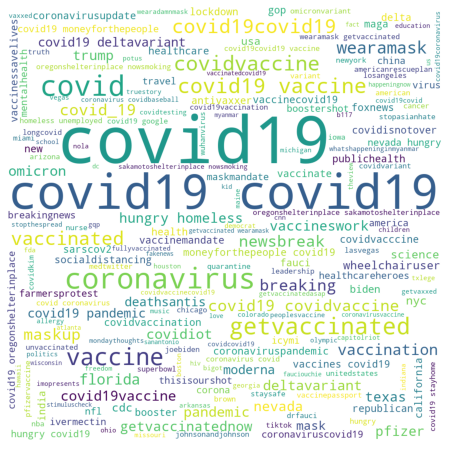

In [ ]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from nltk import word_tokenize, sent_tokenize, FreqDist


In [ ]:
hashtag = hashtag.split()

In [ ]:
fdist = FreqDist(hashtag)


In [ ]:
fdist

FreqDist({'covid19': 32602,
          'louwestend': 2,
          '2021beginshappynewyear': 1,
          '2021makeawish': 3,
          'bye2020': 3,
          'fireworks': 4,
          'andersoncooper': 1,
          'hello2021': 2,
          'cnnnye': 2,
          'wuhanvirus': 69,
          'trump': 318,
          'coronavirus': 2184,
          'trumpvirus': 41,
          'happynewyear2021': 11,
          'syria': 8,
          'stamfordvt': 1,
          'selectboard': 1,
          'covid19grief': 1,
          'loss': 4,
          'trauma': 6,
          'deathpositive': 3,
          '2021': 46,
          'covid19birding': 1,
          'birdshappynewyear2021': 1,
          'goodbye2020': 2,
          'happynewyear': 24,
          'kind': 2,
          'decent': 1,
          'peaceful': 2,
          'houston': 57,
          'texasgirlnewyear': 1,
          'newyearnewmecovid19': 1,
          'covidb117': 2,
          'florida': 429,
          'faces': 1,
          'funny': 37,
          'f

In [ ]:
popular = list(fdist.keys())

In [ ]:
value = list(fdist.values())

In [ ]:
type(popular)

list

In [ ]:
popular[0]

'covid19'

In [ ]:
fdist.values()

dict_values([32602, 2, 1, 3, 3, 4, 1, 2, 2, 69, 318, 2184, 41, 11, 8, 1, 1, 1, 4, 6, 3, 46, 1, 1, 2, 24, 2, 1, 2, 57, 1, 1, 2, 429, 1, 37, 2, 4, 1, 9, 6, 4, 1, 1, 23, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1779, 1, 1, 1, 141, 1, 1, 7, 1, 7, 1, 1, 58, 1, 2, 3, 58, 3, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 121, 807, 1, 1, 1, 22, 1, 20, 10, 3, 1, 10, 1, 1, 1, 1, 1, 39, 34, 23, 650, 1, 5, 3, 1, 28, 1, 1, 1, 1, 1, 11, 83, 167, 4, 171, 1, 1, 4, 1, 1, 1, 48, 1767, 1, 1, 6, 4, 20, 149, 7, 1, 1251, 127, 2, 2, 1, 1, 1, 155, 10, 7, 2, 1, 4, 4, 4, 128, 35, 1, 5, 52, 2, 20, 13, 2, 5, 1, 1, 4, 1, 7, 5, 3, 5, 6, 1, 1, 27, 2, 10, 1, 1, 2, 69, 15, 3, 9, 3, 1, 13, 1, 1, 1, 2, 1, 1, 101, 42, 17, 265, 1, 4, 1, 2, 1, 11, 66, 11, 6, 1, 899, 4, 473, 25, 1, 1, 1, 6, 1, 46, 5, 1, 1, 12, 1, 16, 35, 18, 2, 17, 80, 1, 5, 148, 456, 4, 1, 1, 2, 10, 17, 1, 1, 4, 22, 15, 119, 1, 1, 1, 2, 75, 1, 192, 1, 2, 9, 2, 6, 3, 4, 7, 26, 3, 9, 1, 1, 1, 1, 7, 1, 1, 1, 527, 1, 170, 3, 23, 25, 1, 1, 1, 1, 1, 4, 1, 1, 

In [ ]:
def horizontal_bargraph(y, x):
  sequence = {}
  for i in range(len(y)):
    sequence[y[i]] = x[i]
      
  sequence  = dict(sorted(sequence.items(), key=lambda item: item[1]))
  sequence  = sorted(sequence.items(), key=lambda item: item[1])
  vert = list(sequence.keys(50))
  hori = list(sequence.values(50))

  plt.barh(vert, hori)
  plt.ylabel("word frequency")
  
  plt.xlabel("count")
  plt.title("Horizontal bar graph")
  plt.show()

In [ ]:
horizontal_bargraph(value, popular)

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

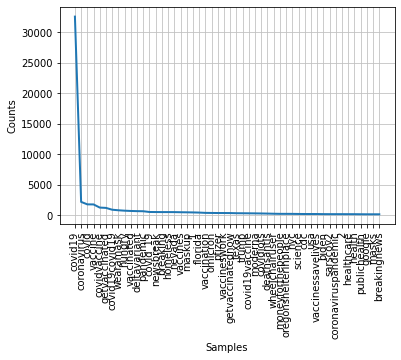

In [ ]:
plt = fdist.plot(50)

In [ ]:
fdist['breakingnews']

148

In [ ]:
!pip install --upgrade 'tensorflow_data_validation[visualization]<2'

In [ ]:
import tensorflow_data_validation as tfdv


In [ ]:
stats = tfdv.generate_statistics_from_dataframe(Coviddata)

In [ ]:
tfdv.visualize_statistics(stats)

In [ ]:
!pip3 install quickda


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import pandas as pd
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *



concat() got an unexpected keyword argument 'join_axes'


In [ ]:
explore(Coviddata)

/usr/local/lib/python3.7/dist-packages/quickda/explore_data.py:26: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/quickda/explore_data.py:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



dtypes   count  null_sum  null_pct  ...  mean median std skew
country            object  964739      3978     0.004  ...     -      -   -    -
country_code       object  963358      5359     0.006  ...     -      -   -    -
created_at         object  968717         0     0.000  ...     -      -   -    -
favorite_count     object  968717         0     0.000  ...     -      -   -    -
id_str             object  968717         0     0.000  ...     -      -   -    -
is_retweet         object  968717         0     0.000  ...     -      -   -    -
lattitude          object   26202    942515     0.973  ...     -      -   -    -
longitude          object   26202    942515     0.973  ...     -      -   -    -
media              object   41529    927188     0.957  ...     -      -   -    -
retweet_count      object  968717         0     0.000  ...     -      -   -    -
text               object  968717         0     0.000  ...     -      -   -    -
user_description   object  904781     63936     0.066  ...     -      -   -    -
user_followers     object  968717         0     0.000  ...     -      -   -    -
user_id            object  968717         0     0.000  ...     -      -   -    -
user_name          object  968639        78     0.000  ...     -      -   -    -
user_verification  object  968717         0     0.000  ...     -      -   -    -

[16 rows x 14 columns]

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Capstone/misinformation/coviddata/Covid2020.csv')

In [ ]:
data.count()

id_str               1030954
favorite_count       1030954
text                 1030954
is_retweet           1030954
created_at           1030954
retweet_count        1030954
media                  33700
country_code         1026867
country              1028101
lattitude              34463
longitude              34463
user_id              1030954
user_name            1030760
user_description      958173
user_verification    1030954
user_followers       1030954
dtype: int64

In [ ]:
data.country.value_counts()

United States            565644
United Kingdom           145615
Canada                    65255
India                     53966
Australia                 24044
                          ...  
São Tomé and Príncipe         1
French Polynesia              1
Christmas Island              1
Western Sahara                1
Tokelau                       1
Name: country, Length: 236, dtype: int64

In [ ]:
data['text'][5]

'b\'room temperature for up to 12 hours.\\n\\nCharlie Riedel/AP\\n\\nA now-former employee at a Wisconsin medical center "inten\\xe2\\x80\\xa6 https://t.co/X2YUD7RYwU\''